# Title: MVP 3

Name    : Joshua Hor Soong, Cheng
Email   : chen7647@umn.edu 


## 1. Design Framework

### 1.1. Problem Statement
- studying the differences about the zoning plans Minneapolis council has between now and 2040

### 1.2. Solution
using geopandas, we can plot each zones on the mineapolis map. both the current zones and the zone plans for 2040 to determine how much more residential or industrial is the council planning for Minneapolis to become

### 1.3. Challenge
determining the best way to evaluate the change of these zone change plans

### 1.4 Spec list

Fill in the spec list table below.
  * Value: (H)igh, (M)edium, (L)ow
  * Effort: (H)igh, (M)edium, (L)ow
  * Feature: Brief description of the feature


| Value | Effort  | Feature    | 
|:------|:--------|:-----------|
| H     | L       | a geographic visual comparison of the current zones vs the zone plans in 2040 |
| H     | M       | get the statistical calculations of the land size change of each zones |
| M     | H       | GeoAI processing - success rate of this change |


___

# 2. Minimal Viable Product

## 2.1.1 Setup & Installation

In the code cell below, you will write all your import and load statements for the packages and data needed for your project.

In [60]:
# Import Modules and Packages you need to run your MVP in this code cell
# %pip install contextily
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

## 2.1.2 Opening .shp file and Evaluating table


,OBJECTID,Land_Use,Land_Use_C,RuleID,Shape__Are,Shape__Len,geometry,color
0,1,Community Mixed Use,CM3,3,1.536807e+06,8634.627630,"POLYGON ((-10380666.499 5619819.426, -10380752...",cyan
1,2,Community Mixed Use,CM3,3,8.506568e+05,6698.324164,"POLYGON ((-10380162.544 5616517.416, -10380162...",cyan
2,3,Community Mixed Use,CM3,3,8.438099e+05,8203.085654,"POLYGON ((-10385535.998 5619061.383, -10385620...",cyan
3,4,Community Mixed Use,CM3,3,7.769236e+05,8416.146208,"POLYGON ((-10378866.861 5613971.531, -10378840...",cyan
4,5,Community Mixed Use,CM3,3,6.776263e+05,5310.060406,"POLYGON ((-10380509.12 5616192.283, -10380465....",cyan
...,...,...,...,...,...,...,...,...
1255,1256,Urban Neighborhood 3,UN3,15,1.898438e+00,252.992459,"POLYGON ((-10377612.098 5605896.357, -10377610...",cyan
1256,1257,Urban Neighborhood 3,UN3,15,1.714844e+00,793.892966,"POLYGON ((-10378269.074 5610302.759, -10378269...",cyan
1257,1258,Urban Neighborhood 3,UN3,15,1.687500e+00,18.904717,"POLYGON ((-10382598.525 5625305.118, -10382598...",cyan
1258,1259,Urban Neighborhood 3,UN3,15,9.296875e-01,26.971215,"POLYGON ((-10382604.194 5624769.911, -10382604...",cyan


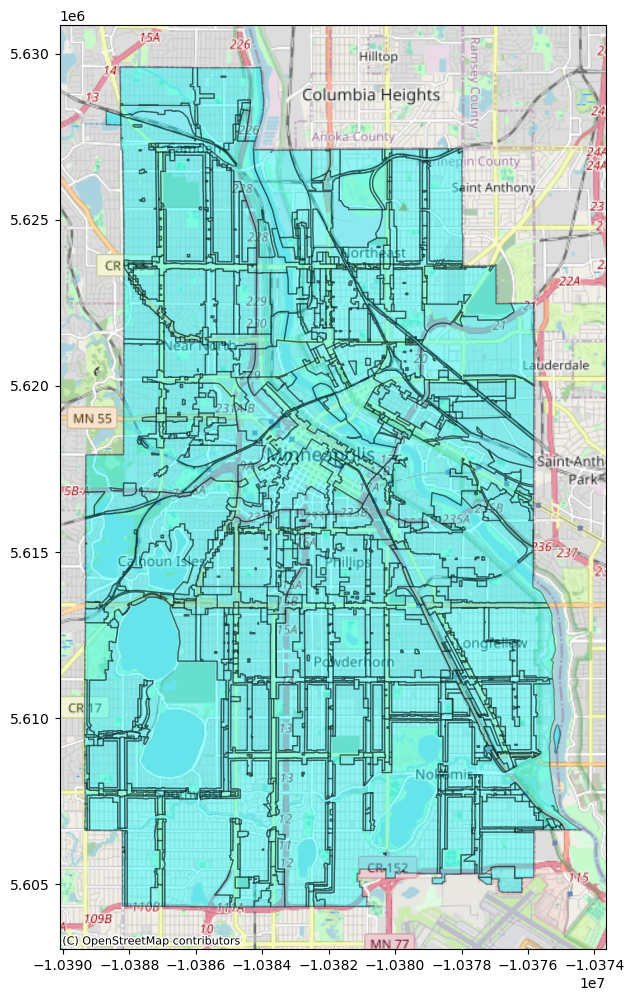

In [92]:
shp_filePath = r"Planning_Primary_Zoning\Planning_Primary_Zoning.shp"

gdf = gpd.read_file(shp_filePath)
# gdf = gdf.to_crs(epsg=3857)
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

gdf["color"] = "cyan"
gdf.plot(ax=ax, color=gdf["color"], edgecolor='k', linewidth=1.0, alpha=0.4)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

gdf


In [98]:
gdf[["Land_Use", "Land_Use_C"]]

# Get unique values for 'Land_Use'
land_use_unique = gdf['Land_Use'].unique()
print("Unique values in 'Land_Use':")
print(land_use_unique)
print(len(land_use_unique))
print("-" * 30) # Separator

# Get unique values for 'Land_Use_C'
land_use_c_unique = gdf['Land_Use_C'].unique()
print("Unique values in 'Land_Use_C':")
print(land_use_c_unique)
print(len(land_use_c_unique))

Unique values in 'Land_Use':
['Community Mixed Use' 'Corridor Mixed Use' 'Destination Mixed Use'
 'Downtown Center' 'Downtown Destination' 'Neighborhood Mixed Use'
 'Production and Processing' 'Production Mixed Use'
 'Residence and Institutional' 'Residence Goods and Services'
 'Residence Office and Services' 'Transportation' 'Urban Neighborhood 1'
 'Urban Neighborhood 2' 'Urban Neighborhood 3']
15
------------------------------
Unique values in 'Land_Use_C':
['CM3' 'CM2' 'CM4' 'DT1' 'DT2' 'CM1' 'PR2' 'PR1' 'RM3' 'RM1' 'RM2' 'TR1'
 'UN1' 'UN2' 'UN3']
15


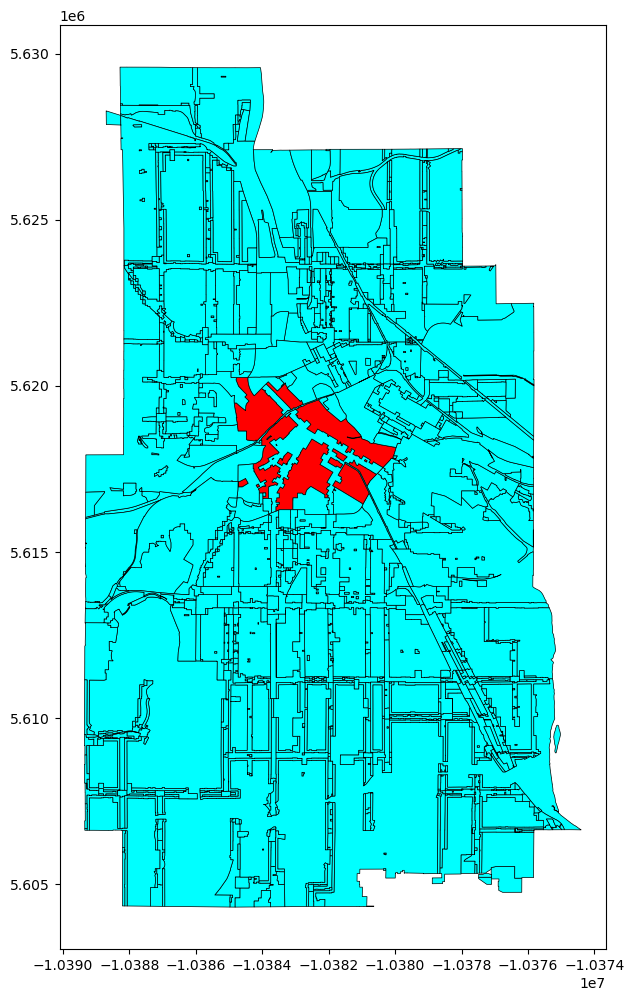

In [77]:
gdf_DT = gdf
gdf_DT.loc[gdf_DT['Land_Use_C'] == 'DT1', 'color'] = 'red'

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
gdf_DT.plot(ax=ax, color=gdf_DT["color"], edgecolor='k', linewidth=0.5)
plt.show()

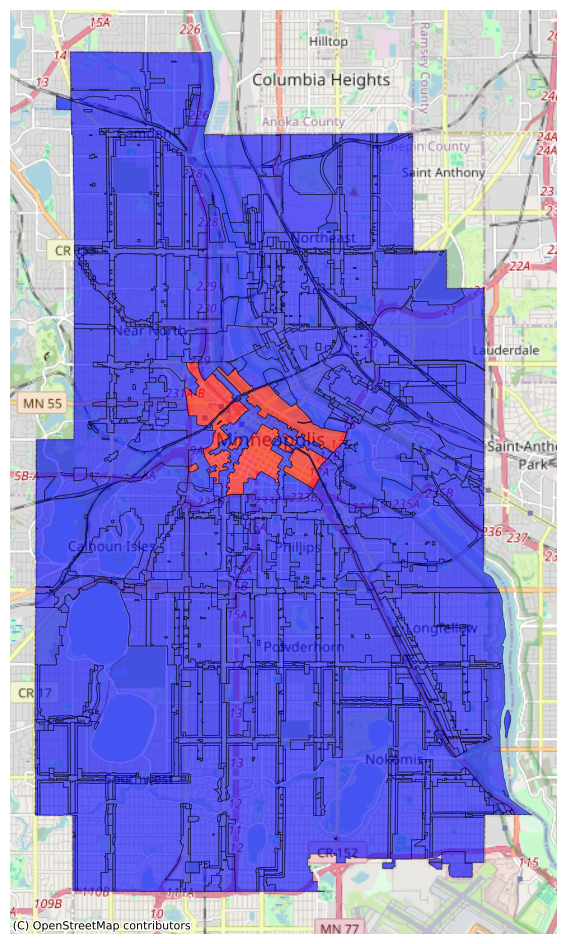

In [ ]:
# In the cell with id: 9e5d35ed
shp_filePath = r"Planning_Primary_Zoning\Planning_Primary_Zoning.shp"
gdf = gpd.read_file(shp_filePath)

# Ensure the GeoDataFrame is in the right projection for web maps
gdf = gdf.to_crs(epsg=3857)

# Create a color column - default to blue
gdf['color'] = 'blue'
# Set color to red where Land_Use_C is DT1
gdf.loc[gdf['Land_Use_C'] == 'DT1', 'color'] = 'red'

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 12)) # Increased size slightly

# Plot the GeoDataFrame using the color column
gdf.plot(ax=ax, color=gdf['color'], alpha=0.6, edgecolor='k', linewidth=0.5)

# Add the basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Optional: Remove axis labels
ax.set_axis_off()

# Show plot
plt.show()

# --- Remove or comment out the previous plotting code below this line ---
# fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# print(type(gdf[["Land_Use", "Land_Use_C"]]))
# gdf.plot(ax=ax)
# ... rest of the old code in this cell ...

## 2.2. Functions
This section defines all functions that will be used in your MVP and Project.

### Pre-processing functions

In [ ]:
def please_rename_me():
    pass

def rename_me_too():
    pass

### Analysis functions


In [ ]:
def another_function():
    pass

### Misc. functions

In [ ]:
def yet_another_function_here():
    pass

## 2.3. Execute your code. Let's go
These code cells will actually make your code run. Up until now you have only imported modules and defined modules.
This is where you start running code, passing variables, and creating maps, plots, and analytical results.

### Preparation and Pre-Processing Phase

In [ ]:
# Preparation and pre-processing code here

rename_me_too()

### Analysis and Modeling Phase

In [ ]:
another_function()

### Visualization and Plotting Phase

In [ ]:
yet_another_function_here()

## 2.4. Rationale
Why is this an MVP?
